A Jupyter Notebook that fetches data from a URL in CSV format and generates various plots:
* Temperature: Visualize the temperature over time.
* Daily Mean Temperature: Calculate and plot the average temperature for each day.
* Monthly Mean Temperature: Calculate and plot the average temperature for each month.
* Windspeed: Visualize the windspeed over time.
* Rolling Windspeed: Calculate and plot the rolling windspeed over a 24-hour period.
* Daily Max Windspeed: Find and plot the maximum wind speed for each day.
* Monthly Mean of Daily Max Windspeeds: Calculate and plot the monthly average of the daily maximum wind speeds.

The data set is obtained from: https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

Author: Tomasz Uszynski

***

### Preparing the data:

First of all is necessary to organise libraries. 

In [1]:
# Importing the required libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

The next step is reading data from the CSV file. In this case, it is mandatory to remove 23 rows from the data set. The skipped rows represent the description of the data set. The `head()` is used to examine the data set.

In [2]:
# Taking data from the URL and dropping 23 rows from the top.
df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=23)
df.head(3)

C:\Users\samsu\AppData\Local\Temp\ipykernel_25748\729475365.py:2: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


Checking data types.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246930 entries, 0 to 246929
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    246930 non-null  object 
 1   ind     246930 non-null  int64  
 2   rain    246930 non-null  object 
 3   ind.1   246930 non-null  int64  
 4   temp    246930 non-null  float64
 5   ind.2   246930 non-null  int64  
 6   wetb    246930 non-null  float64
 7   dewpt   246930 non-null  float64
 8   vappr   246930 non-null  float64
 9   rhum    246930 non-null  int64  
 10  msl     246930 non-null  object 
 11  ind.3   246930 non-null  int64  
 12  wdsp    246930 non-null  object 
 13  ind.4   246930 non-null  int64  
 14  wddir   246930 non-null  object 
 15  ww      246930 non-null  object 
 16  w       246930 non-null  object 
 17  sun     246930 non-null  float64
 18  vis     246930 non-null  object 
 19  clht    246930 non-null  object 
 20  clamt   246930 non-null  object 
dtypes: float64

For plotting, it is necessary to convert the date columns to the datetime format.

In [4]:
# Convert date column to datetime 
df['date'] = pd.to_datetime(df['date'])

C:\Users\samsu\AppData\Local\Temp\ipykernel_25748\2851015191.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


Checking if the data type is converted correctly.

In [5]:
# Check the data type of only the 'date' column
date_column_dtype = df['date'].dtype
print("Data type of 'date' column is: ", date_column_dtype)

Data type of 'date' column is:  datetime64[ns]


Setting the 'date' column as the index of the dataframe and checking the result.

In [6]:
df.set_index('date', inplace=True) 
df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7


Identifying missing values in the data set.

In [7]:
# Checking for different representations of missing values 
missingData = df.isin(['', ' ', 'NA', 'NaN', 'null']).sum()
print(missingData)

ind          0
rain        49
ind.1        0
temp         0
ind.2        0
wetb         0
dewpt        0
vappr        0
rhum         0
msl         18
ind.3        0
wdsp        50
ind.4        0
wddir       52
ww       54712
w        54713
sun          0
vis      61807
clht        18
clamt       18
dtype: int64


***

### Plotting:

***

Plot temperature over time.

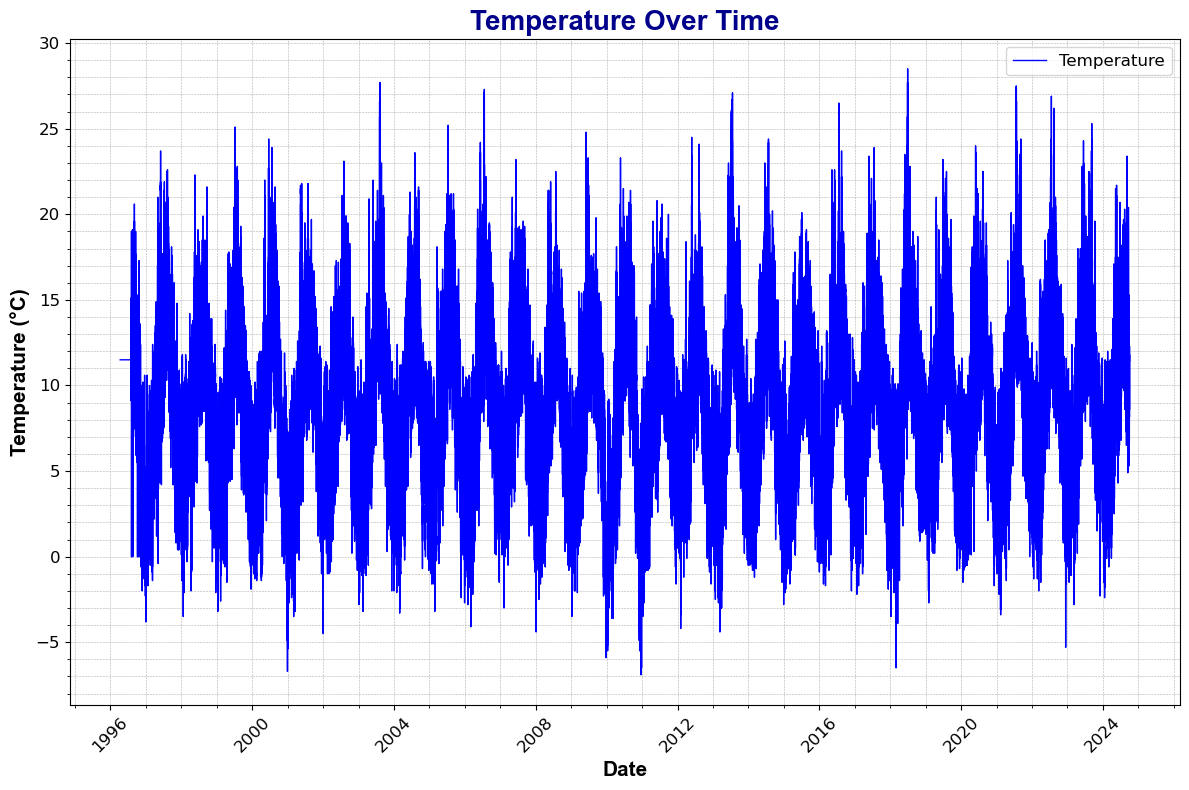

In [8]:
# Adjusted figure size
plt.figure(figsize=(12, 8))

# Plot with Seaborn
sns.lineplot(data=df, x="date", y="temp", color='blue', linestyle='-', linewidth=1)
plt.title('Temperature Over Time', fontsize=20, fontweight='bold', fontname='Arial', color='darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', fontname='Arial')
plt.ylabel('Temperature (°C)', fontsize=15, fontweight='bold', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.minorticks_on()
plt.legend(['Temperature'], loc='upper right', fontsize=12)
# Adjust layout to fit labels
plt.tight_layout()
plt.show()


With such a large amount of data, a clear visualization of the results is impossible. A much narrower range of observations can be selected to achieve a more precise result. 

Here is the sample:

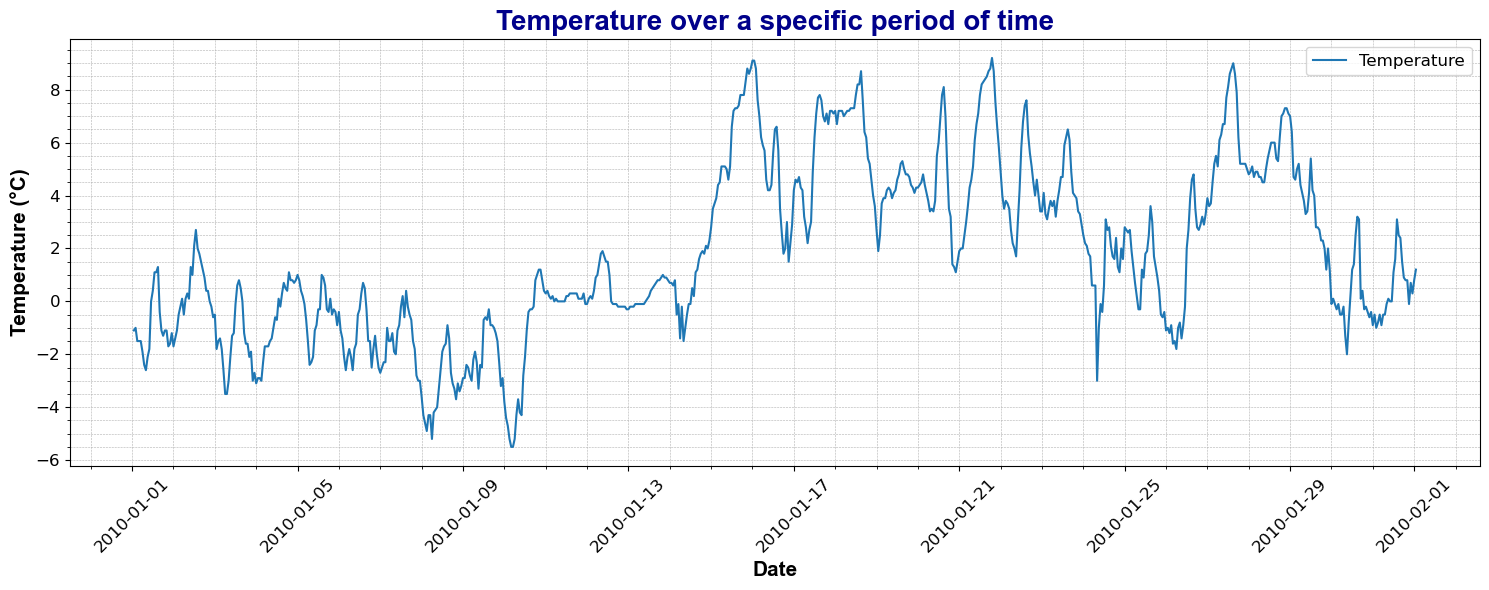

In [16]:
# Filter data for a specific date range 
dateFrom = "2010-01-01 01:00:00"
dateTo = "2010-02-01 01:00:00" 
filteredDf = df.loc[dateFrom:dateTo]

# Plot with Seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(data=filteredDf, x="date", y="temp")
plt.title('Temperature over a specific period of time', fontsize=20, fontweight='bold', fontname='Arial', color='darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', fontname='Arial')
plt.ylabel('Temperature (°C)', fontsize=15, fontweight='bold', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.minorticks_on()
plt.legend(['Temperature'], loc='upper right', fontsize=12)
# Adjust layout to fit labels
plt.tight_layout()
plt.show()

***

Plot of mean temperature for each day.

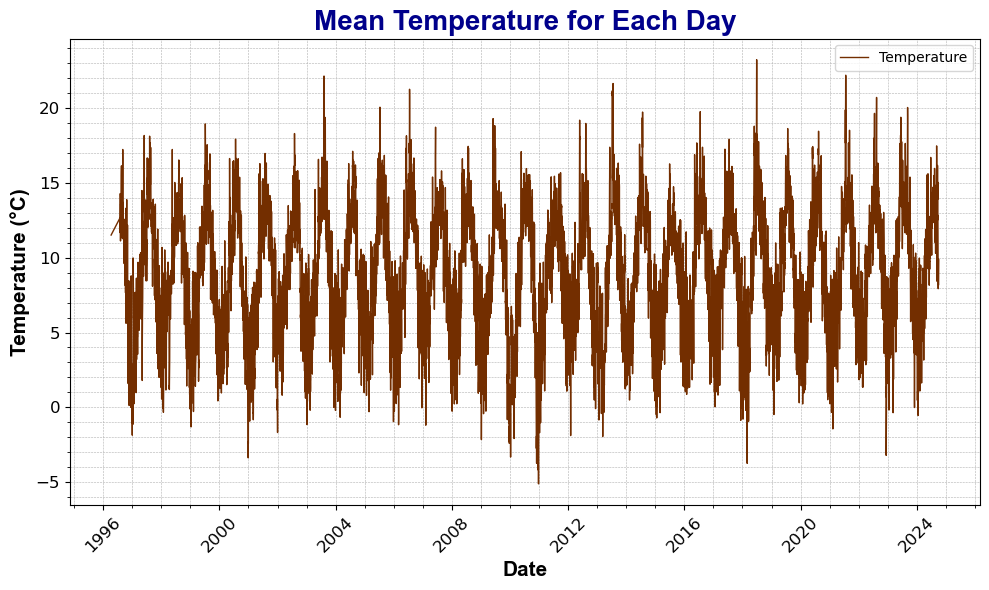

In [17]:
# Calculate the mean temperature for each day
dailyMeanTemp = df['temp'].resample('D').mean()

# Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=dailyMeanTemp, color='#732E00', linestyle='-', linewidth=1)
plt.title('Mean Temperature for Each Day', fontsize=20, fontweight='bold', fontname='Arial', color='darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', fontname='Arial')
plt.ylabel('Temperature (°C)', fontsize=15, fontweight='bold', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.minorticks_on()
plt.legend(['Temperature'], loc='upper right', fontsize=10)
# Adjust layout to fit labels
plt.tight_layout()
plt.show()

As previously mentioned, with that amount of data, it's hard to analyse. Selecting a different amount of data makes the plot much clearer. 

Here is the sample:

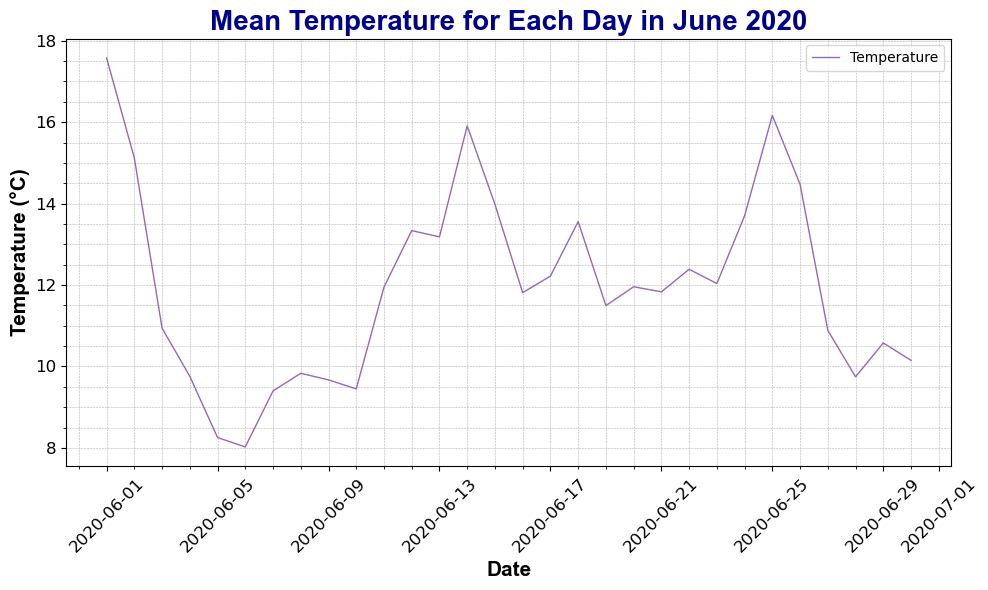

In [23]:
# Filter data for a specific period of time.
startDate = "2020-06-01 01:00:00"
endDate = "2020-06-30 01:00:00"
filteredDf = df.loc[startDate:endDate]

# Calculate the mean temperature for each day in the filtered data
dailyMeanTemp = filteredDf['temp'].resample('D').mean()

# Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=dailyMeanTemp, color='#9467be', linestyle='-', linewidth=1)
plt.title('Mean Temperature for Each Day in June 2020', fontsize=20, fontweight='bold', fontname='Arial', color='darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', fontname='Arial')
plt.ylabel('Temperature (°C)', fontsize=15, fontweight='bold', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.minorticks_on()
plt.legend(['Temperature'], loc='upper right', fontsize=10)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

***

Plot of the mean temperature for each month.

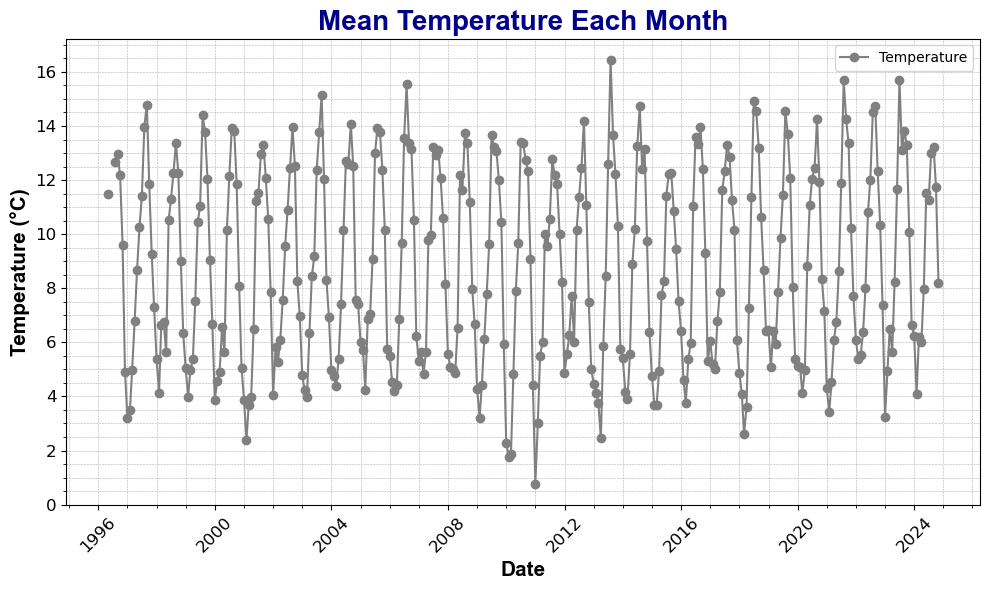

In [24]:
# Calculate the mean temperature for each month
monthlyMeanTemp = df['temp'].resample('M').mean()

# Plot with Matplotlib
plt.figure(figsize=(10, 6))
#sns.lineplot(monthly_mean_temp,  marker='o', markersize=5, color='grey',linestyle='-', linewidth=1 )
plt.plot(monthlyMeanTemp.index, monthlyMeanTemp, marker='o', linestyle='-', color='grey')
plt.title('Mean Temperature Each Month', fontsize=20, fontweight='bold', fontname='Arial', color='darkblue')
plt.xlabel('Date', fontsize=15, fontweight='bold', fontname='Arial')
plt.ylabel('Temperature (°C)', fontsize=15, fontweight='bold', fontname='Arial')
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.minorticks_on()
plt.legend(['Temperature'], loc='upper right', fontsize=10)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()